In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
import pandas as pd
import numpy as np
from rdkit import RDLogger
from rdcanon import canon_reaction_smarts
RDLogger.DisableLog('rdApp.*')

stemona_alkaloids = Chem.SDMolSupplier("data/coconut_simple_search_curcumin.sdf")
cleaned_stemona_alk = []
for r in stemona_alkaloids:
    if r is not None:
        try: Chem.SanitizeMol(r)
        except: continue
        if Descriptors.ExactMolWt(r) > 500: continue
        if "se" in Chem.MolToSmiles(r): continue
        cleaned_stemona_alk.append(r)
print(len(cleaned_stemona_alk))

quer = Chem.SDMolSupplier("data/coconut_simple_search_quercetin.sdf")
cleaned_quer = []
for r in quer:
    if r is not None:
        try: Chem.SanitizeMol(r)
        except: continue
        if Descriptors.ExactMolWt(r) > 500: continue
        if "se" in Chem.MolToSmiles(r): continue
        cleaned_quer.append(r)
print(len(cleaned_quer))


run_reactants_experiments = pd.read_excel("data/reaction_smarts_out.xlsx")

rso = [AllChem.ReactionFromSmarts(x) for x in run_reactants_experiments["reaction_smarts"]]
pcso = [AllChem.ReactionFromSmarts(canon_reaction_smarts(x, True, "pubchem")) for x in run_reactants_experiments["reaction_smarts"]]
dbso = [AllChem.ReactionFromSmarts(canon_reaction_smarts(x, True, "drugbank")) for x in run_reactants_experiments["reaction_smarts"]]
npso = [AllChem.ReactionFromSmarts(canon_reaction_smarts(x, True, "npatlas")) for x in run_reactants_experiments["reaction_smarts"]]
no_map = [canon_reaction_smarts(x, False, "drugbank") for x in run_reactants_experiments["reaction_smarts"]]


165
82


In [2]:
from rdcanon import util
import timeit
import time

t1s, t2s, t3s, t4s = [], [], [], []

for i in range(0,10):

    t1 = timeit.timeit(
        lambda: util.compare_retrosim(run_reactants_experiments["reaction_smarts"], rso, cleaned_stemona_alk),
        number=1,
        timer=time.process_time,
    )

    print(t1)
    t1s.append(t1)

    t2 = timeit.timeit(
        lambda: util.compare_retrosim(no_map, pcso, cleaned_stemona_alk),
        number=1,
        timer=time.process_time,
    )
    print(t2)
    t2s.append(t2)

    t3 = timeit.timeit(
        lambda: util.compare_retrosim(no_map, dbso, cleaned_stemona_alk),
        number=1,
        timer=time.process_time,
    )
    print(t3)
    t3s.append(t3)

    t4 = timeit.timeit(
        lambda: util.compare_retrosim(no_map, npso, cleaned_stemona_alk),
        number=1,
        timer=time.process_time,
    )
    print(t4)
    t4s.append(t4)

    print()
print(np.mean(t1s),
        np.mean(t2s),
        np.mean(t3s),
        np.mean(t4s))

19.033744000000013
16.782782999999995
17.216808999999955
17.026427000000012

18.87171699999999
16.740860999999995
16.880331000000012
16.95022800000004

18.97421499999996
16.928639999999973
16.930926999999997
17.30032

19.44018299999999
17.04689300000007
16.665864000000056
16.782906000000025

19.053511999999955
16.65734199999997
16.924241999999936
16.919573000000014

19.20560599999999
16.944928000000004
16.78646200000003
16.907545000000027

19.288802000000032
16.731194000000073
16.62375099999997
16.845308000000045

18.91617800000006
16.743734000000018
16.674810999999977
16.872146999999927

19.184798999999998
16.970731
16.75091699999996
16.794670999999994

18.873546999999917
16.855895000000032
16.617027000000007
16.858024

19.08423029999999 16.840300100000015 16.80711409999999 16.92571490000001


[[19.033744 16.782783 17.216809 17.026427]
 [18.871717 16.740861 16.880331 16.950228]
 [18.974215 16.92864  16.930927 17.30032 ]
 [19.440183 17.046893 16.665864 16.782906]
 [19.053512 16.657342 16.924242 16.919573]
 [19.205606 16.944928 16.786462 16.907545]
 [19.288802 16.731194 16.623751 16.845308]
 [18.916178 16.743734 16.674811 16.872147]
 [19.184799 16.970731 16.750917 16.794671]
 [18.873547 16.855895 16.617027 16.858024]]


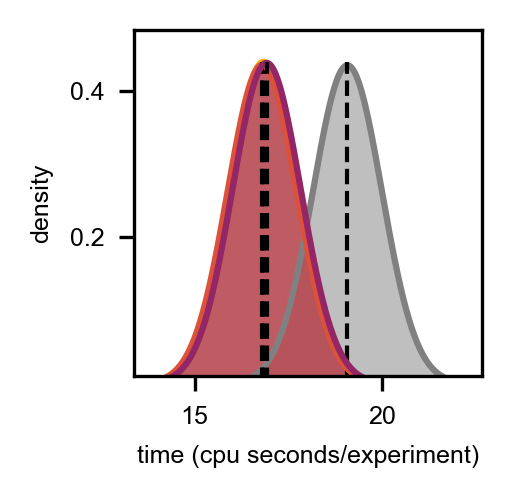

In [3]:
data = np.array([t1s, t2s, t3s, t4s])
print(data.T)
util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=1, bandwidth=0.9, figsize=(1.5, 1.5), title="figures/retrosim_curcuminoid_20240105.png")

In [4]:
from rdcanon import util
import timeit
import time

t1s2, t2s2, t3s2, t4s2 = [], [], [], []

for i in range(0,10):

    t1 = timeit.timeit(
        lambda: util.compare_retrosim(run_reactants_experiments["reaction_smarts"], rso, cleaned_quer),
        number=1,
        timer=time.process_time,
    )

    print(t1)
    t1s2.append(t1)

    t2 = timeit.timeit(
        lambda: util.compare_retrosim(no_map, pcso, cleaned_quer),
        number=1,
        timer=time.process_time,
    )
    print(t2)
    t2s2.append(t2)

    t3 = timeit.timeit(
        lambda: util.compare_retrosim(no_map, dbso, cleaned_quer),
        number=1,
        timer=time.process_time,
    )
    print(t3)
    t3s2.append(t3)

    t4 = timeit.timeit(
        lambda: util.compare_retrosim(no_map, npso, cleaned_quer),
        number=1,
        timer=time.process_time,
    )
    print(t4)
    t4s2.append(t4)

    print()
print(np.mean(t1s2),
        np.mean(t2s2),
        np.mean(t3s2),
        np.mean(t4s2))

10.280783999999926
8.227937999999995
8.319154000000026
8.31514500000003

9.250625999999897
8.234769000000142
8.226897000000008
8.447162999999819

9.24109199999998
8.170233999999937
8.263756999999941
8.37128000000007

9.261250999999902
8.228875000000016
8.28434900000002
8.289121000000023

9.222638999999845
8.19086799999991
8.223451999999952
8.30547300000012

9.27495399999998
8.221742000000177
8.221549000000095
8.333579999999984

9.205046999999922
8.262869000000137
8.26858500000003
8.331951000000117

9.208568999999898
8.150981999999885
8.132796999999982
8.261486999999988

9.235838000000058
8.179626999999982
8.208084999999983
8.30526900000018

9.256593000000066
8.265124000000014
8.1739570000002
8.288925999999947

9.343739299999948 8.213302800000019 8.232258200000024 8.324939500000028


[[10.280784  8.227938  8.319154  8.315145]
 [ 9.250626  8.234769  8.226897  8.447163]
 [ 9.241092  8.170234  8.263757  8.37128 ]
 [ 9.261251  8.228875  8.284349  8.289121]
 [ 9.222639  8.190868  8.223452  8.305473]
 [ 9.274954  8.221742  8.221549  8.33358 ]
 [ 9.205047  8.262869  8.268585  8.331951]
 [ 9.208569  8.150982  8.132797  8.261487]
 [ 9.235838  8.179627  8.208085  8.305269]
 [ 9.256593  8.265124  8.173957  8.288926]]


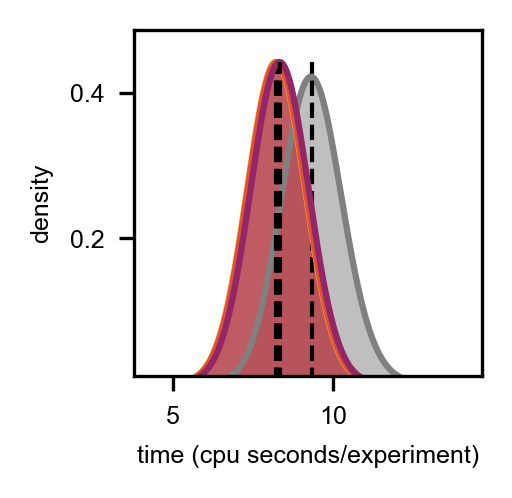

In [5]:
data = np.array([t1s2, t2s2, t3s2, t4s2])
print(data.T)
util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=1.8, bandwidth=0.9, figsize=(1.5, 1.5), title="figures/retrosim_quercerin_20240105.png")